# GLASS CLASSIFICATION

-------------------

## IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [3]:
#importing file

df = pd.read_csv('glass.csv')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

<Axes: >

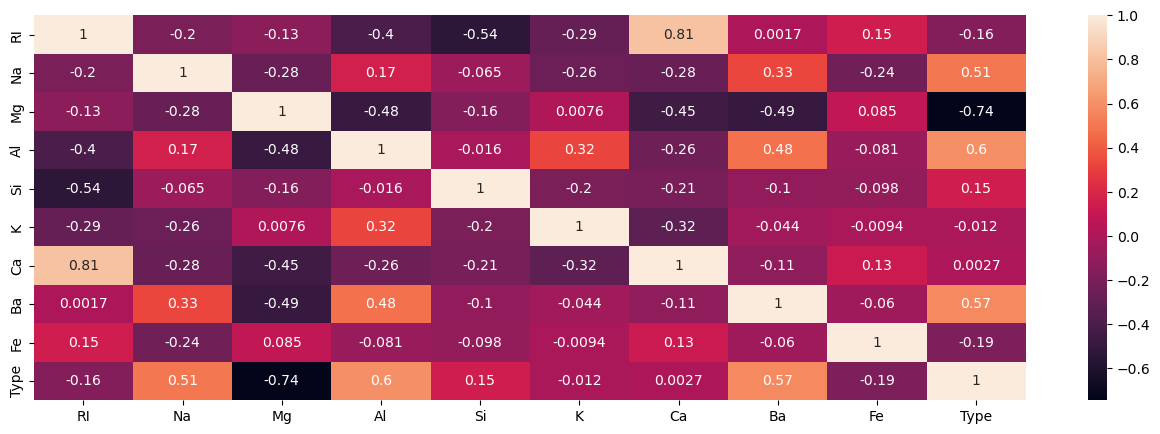

In [11]:
#Correlation

plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True)

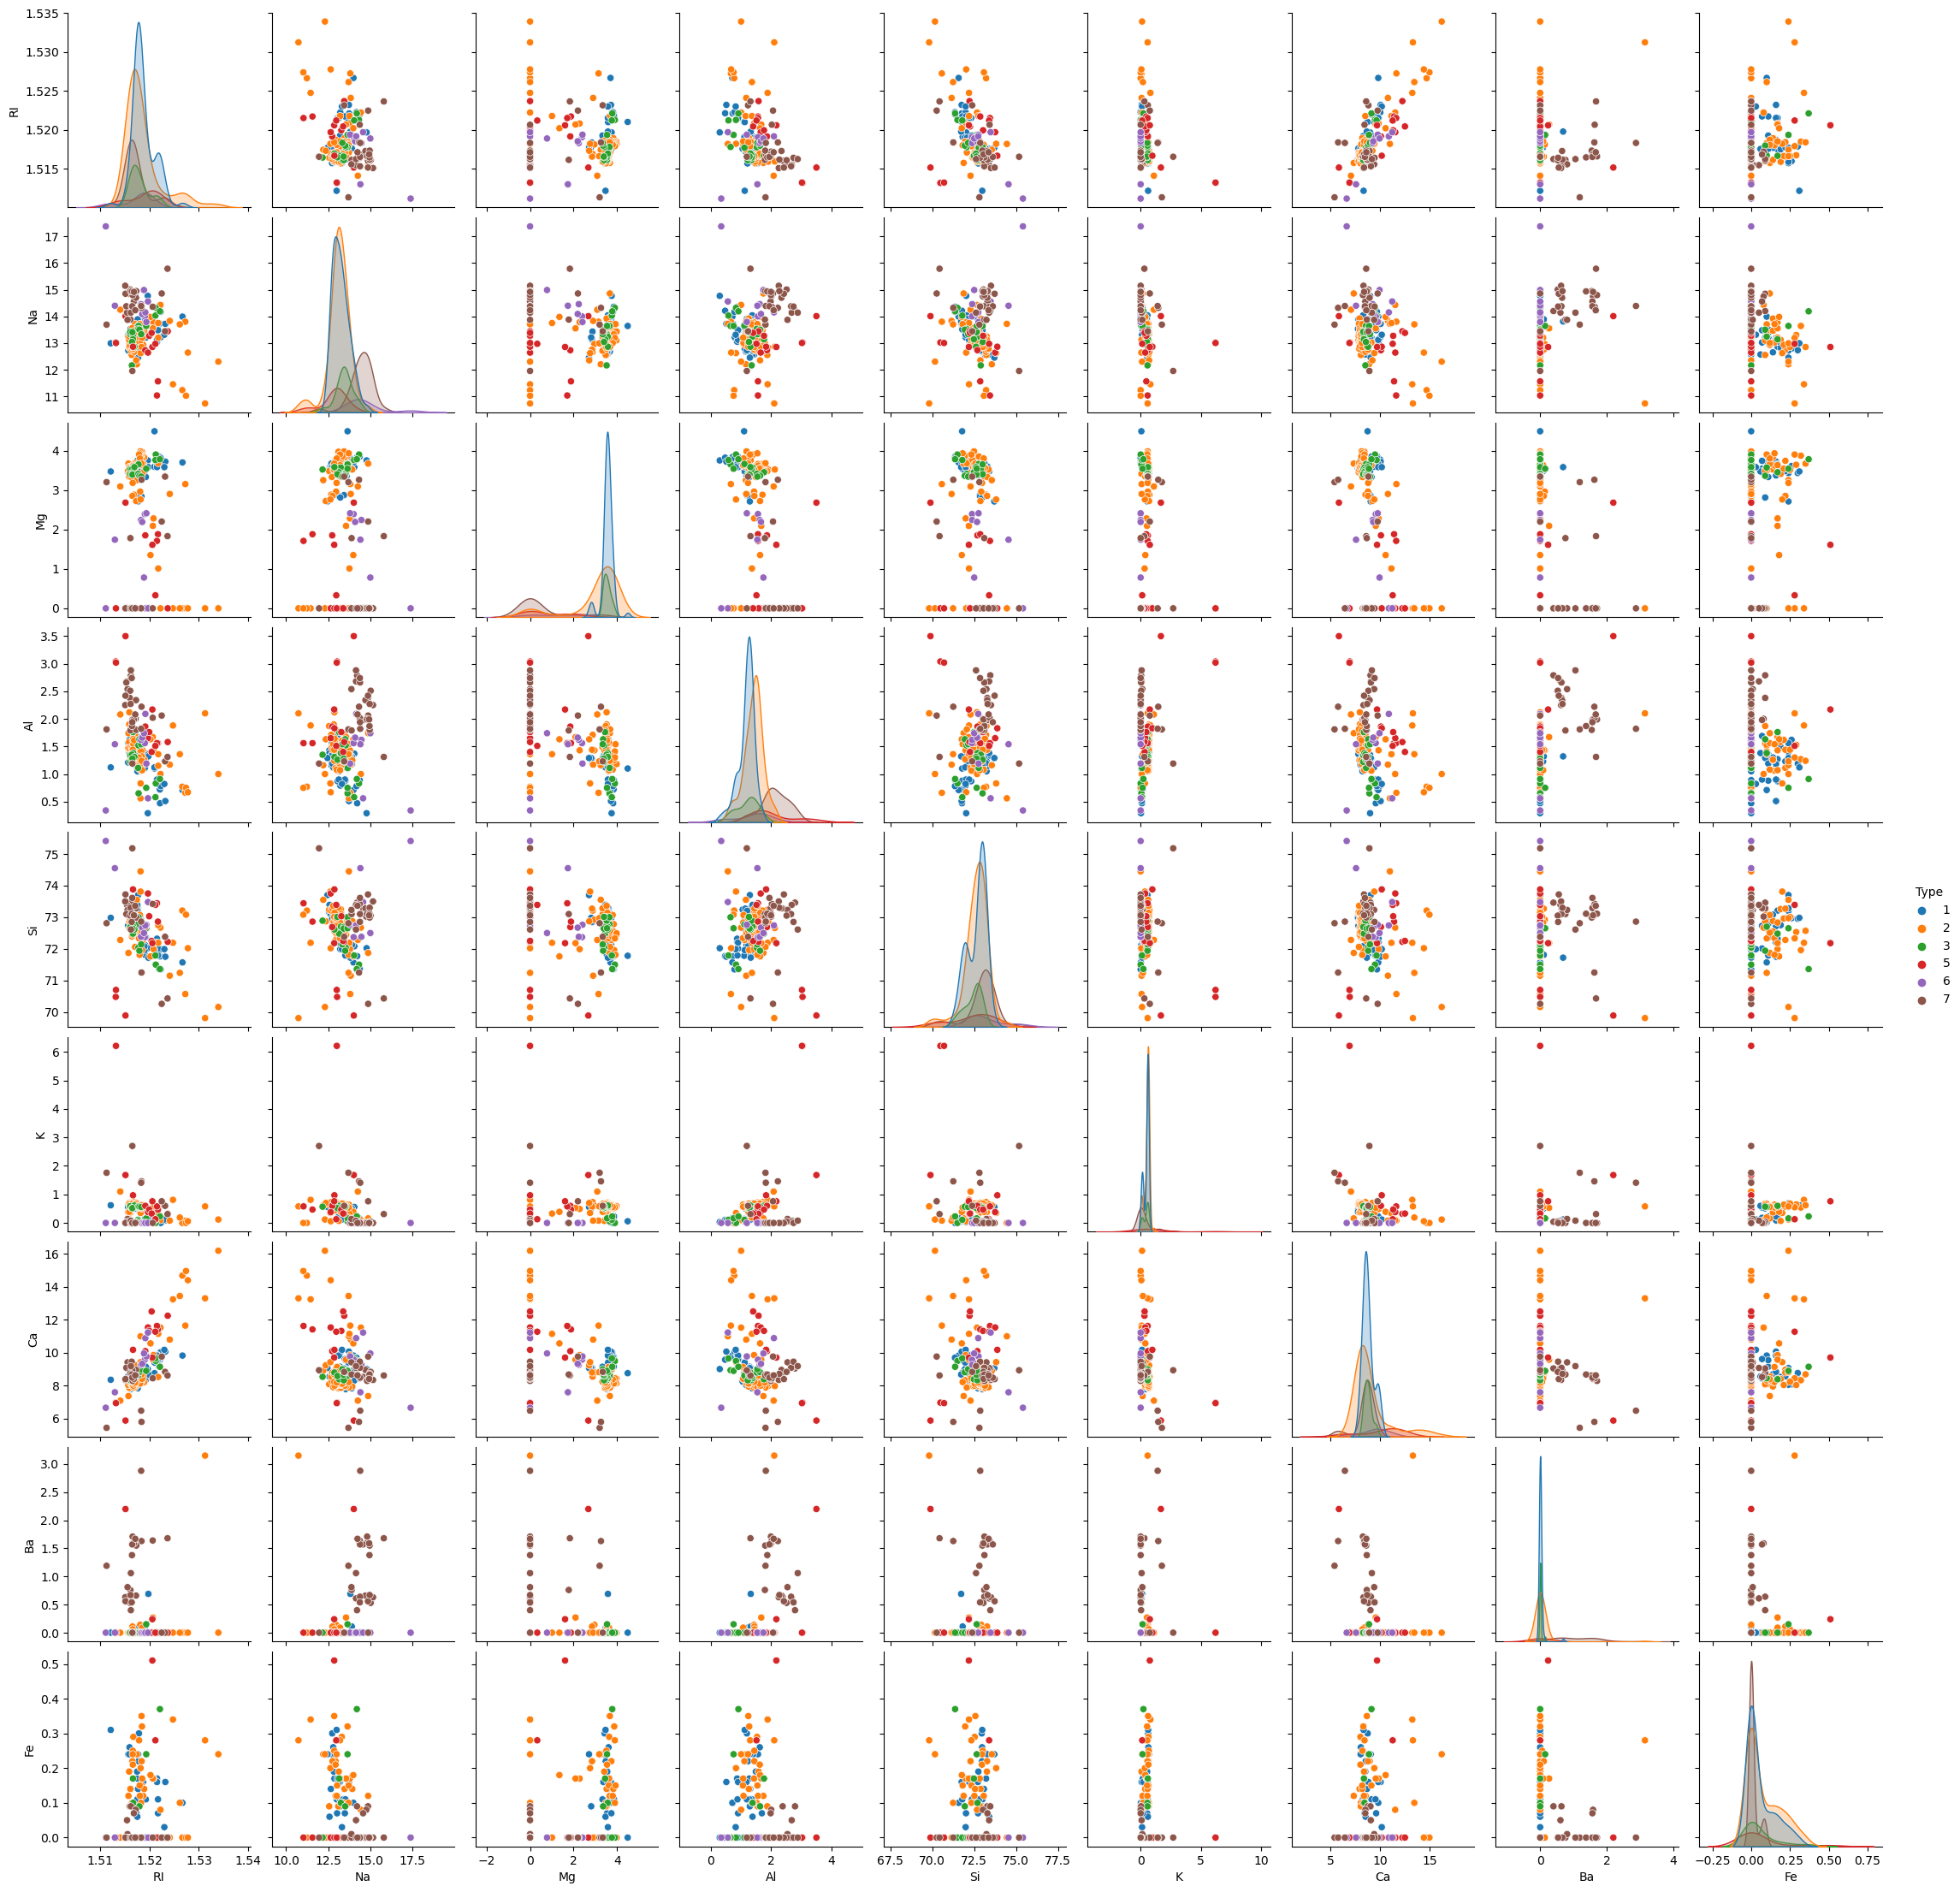

In [31]:
sns.pairplot(data = df, hue = 'Type')

In [13]:
#Turning column "Type" from integer to string value
df['Type'] = df['Type'].apply(str)

<Axes: xlabel='Type', ylabel='count'>

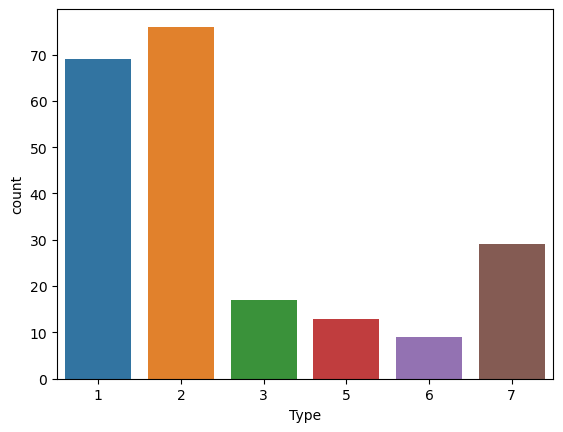

In [14]:
#count of types

sns.countplot(df, x = 'Type')

# K NEAREST NEIGHBORS MODEL

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Standardizing

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(df.drop('Type', axis = 1))

StandardScaler()

In [18]:
scaled_features = scaler.transform(df.drop('Type', axis = 1))

In [19]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


## KNN

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Type'], test_size=0.3, random_state=42)

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
pred = knn.predict(X_test)

In [24]:
print(confusion_matrix(y_test, pred))

[[14  2  2  0  0  0]
 [ 7 15  1  1  0  0]
 [ 1  2  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  2  0  8]]


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.64      0.78      0.70        18
           2       0.71      0.62      0.67        24
           3       0.25      0.25      0.25         4
           5       0.57      1.00      0.73         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.69        64
   macro avg       0.70      0.67      0.66        64
weighted avg       0.72      0.69      0.69        64



## Finding the best K value

In [26]:
error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

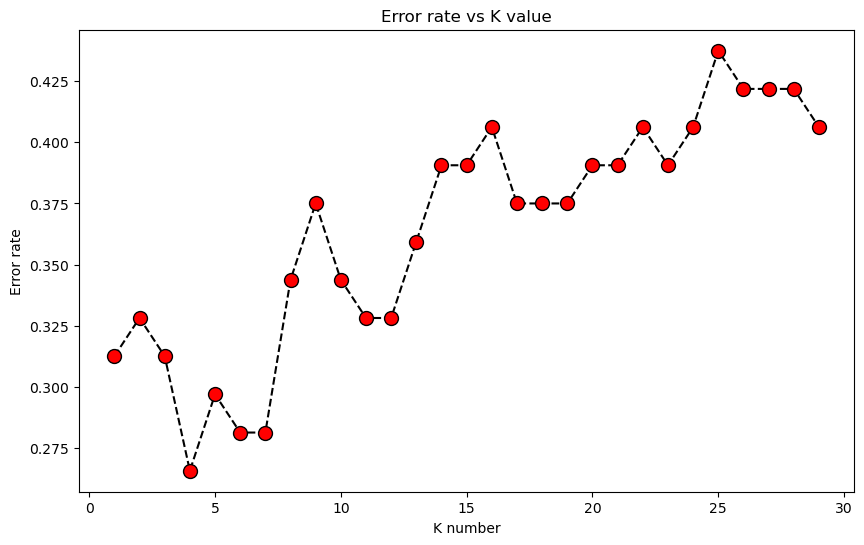

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 30), error_rate, color = 'black', linestyle='dashed', marker= 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs K value')
plt.xlabel('K number')
plt.ylabel('Error rate')

### The best K value seems to be '4'

In [28]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [29]:
print(confusion_matrix(y_test, pred))

[[17  1  0  0  0  0]
 [ 5 17  0  2  0  0]
 [ 1  2  1  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  2  0]
 [ 0  3  0  0  0  8]]


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.74      0.94      0.83        18
           2       0.65      0.71      0.68        24
           3       1.00      0.25      0.40         4
           5       0.50      0.50      0.50         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.73        64
   macro avg       0.82      0.63      0.68        64
weighted avg       0.77      0.73      0.73        64



# SUPPORT VECTOR CLASSIFICATION

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [33]:
svc = SVC()

In [34]:
svc.fit(X_train, y_train)

SVC()

In [35]:
pred = svc.predict(X_test)

In [36]:
print(confusion_matrix(y_test, pred))

[[15  3  0  0  0  0]
 [ 6 18  0  0  0  0]
 [ 1  3  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  2  0]
 [ 0  3  0  0  0  8]]


In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.68      0.83      0.75        18
           2       0.60      0.75      0.67        24
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.70        64
   macro avg       0.71      0.58      0.62        64
weighted avg       0.70      0.70      0.68        64



C:\Users\tberz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tberz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tberz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## GridSearch

In [58]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=5)

In [59]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.467 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.367 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

In [60]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [61]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [62]:
grid_pred = grid.predict(X_test)

In [63]:
print(confusion_matrix(y_test, grid_pred))

[[14  3  1  0  0  0]
 [ 6 17  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 1  1  0  0  0  9]]


In [64]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           1       0.61      0.78      0.68        18
           2       0.71      0.71      0.71        24
           3       0.00      0.00      0.00         4
           5       0.80      1.00      0.89         4
           6       1.00      0.67      0.80         3
           7       1.00      0.82      0.90        11

    accuracy                           0.72        64
   macro avg       0.69      0.66      0.66        64
weighted avg       0.71      0.72      0.71        64

